# Sentiment Analysis On Text in Dari Language

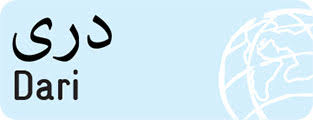

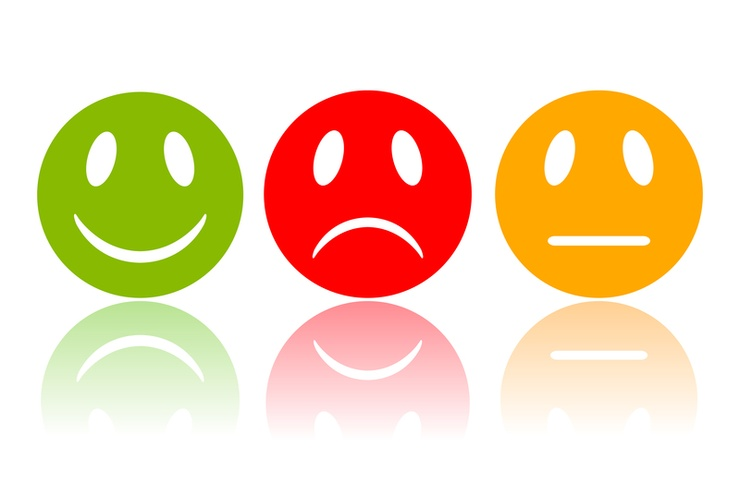

In [1]:
from __future__ import unicode_literals
from hazm import *
import pandas as pd
from nltk import word_tokenize
import re
from sklearn.cross_validation import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import numpy as np
from nltk import BigramAssocMeasures
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.cross_validation import cross_val_score,train_test_split, StratifiedKFold
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib as plt
import matplotlib.pyplot as pt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm


/home/nazifa/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Extracting Data

In [2]:
df = pd.read_csv('/home/nazifa/Documents/Project_Materials/hotel-dataset_N.csv',encoding='UTF-8',quotechar='|',names=['comments','state','c','name','date'])

# Balancing Dataset

In [3]:
pos_data = df[df['state'] == 'pos'].sample(n=2000)
neg_data = df[df['state'] == 'neg'].sample(n=2000)

polarity_data = [pos_data,neg_data]
data = pd.concat(polarity_data, ignore_index=True)
comment = data['comments']


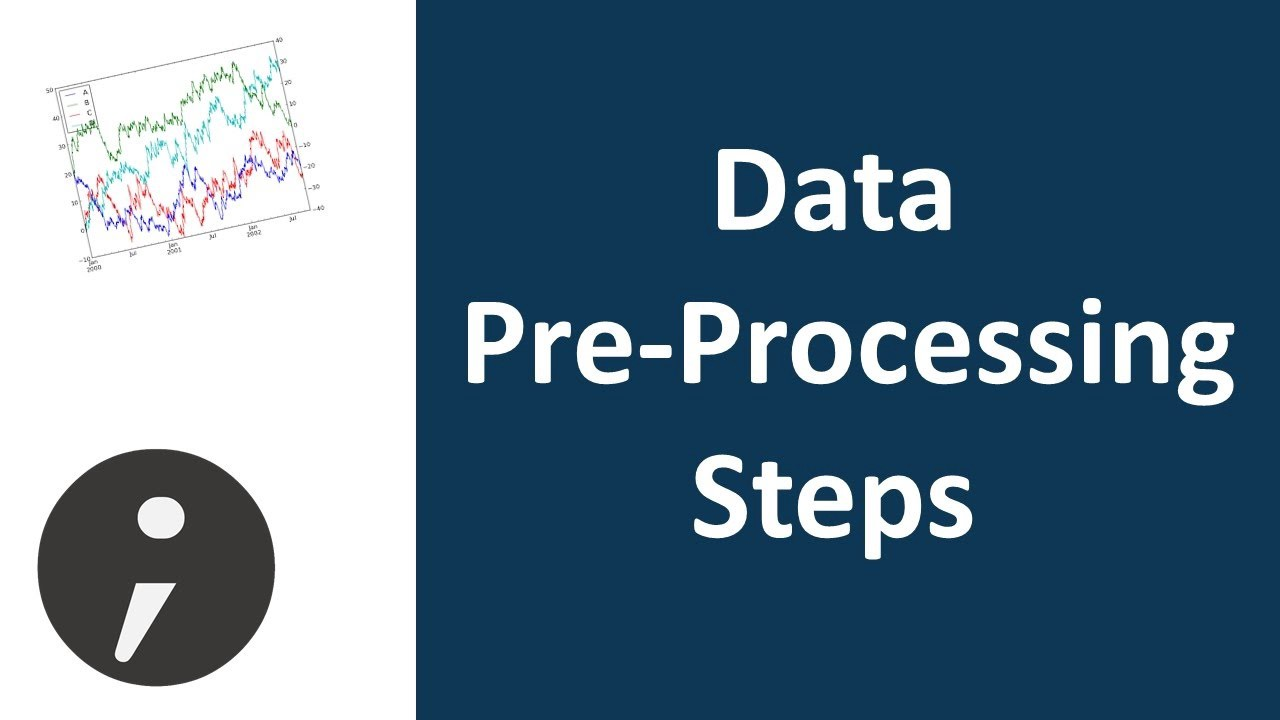

#  Deleting ? , ! , .

There is no scence with ? , ! , . therefore we delete them.


In [4]:
def Removing_dots_qiz_eq(comments):
    dat=[]
    table=str.maketrans("?!.,",4*' ')
    for b in range(0,len(comments)):
        
        dat.append(str(comments[b]).translate(table))
    return dat



comments_1 = Removing_dots_qiz_eq(comment)

In [5]:
print(comments_1[4])

من و همسرم ٥ شب اقامت داشتيم در اين هتل همه چى در حد هتل ٣ ستاره خوب بود  اتاق ها خوب بودن رفتار پرسنل خرب بود مخصوصا خانوم كه مسئول گردشگرى بودن خيلى خوش بر خورد بودن                                 


# Deleting numbers 

In order to having clean data, We delete numbers from our dataset because they do not carray any scence.

In [5]:
def Removing_numbers(comments):
    data=[]
    for b in range(0,len(comments)):
        #output=re.sub(r'\d+','', str(comments[b])
        data.append(re.sub(r'\d+','', str(comments[b])))
    return data

#storing cleaned data from numbers and storing in comments array
comments_2=Removing_numbers(comments_1)

In [40]:
print(comments_2[5])

                     من و همسر و دخترم سه روز در ا ین هتل اقامت داشتیم به جز غذا از همه چیز راضی بودم به خصوص خانم راهنمای بخش گردشگری به ما برنامهمه های خوبی دادند که واقعا به ما خوش گذشت از ایشان و صبر و متانتشان ممنونم                                 


# Function for tokenizing the data

In [6]:
def tokenizing(comm):
    tokenized_data=[]
    for b in range(0,len(comm)):
        tokenized_data.append(word_tokenize(str(comm[b])))
    return tokenized_data

#Tokenizing data and storing to comments array
comments_3=tokenizing(comments_2)

In [45]:
# print(comments_2[8])
a = word_tokenize('من و همسرم یکبار درین هوتل رفتیم هوتل خوبی است از خدمات اش راضی استم')
print(a)

['من', 'و', 'همسرم', 'یکبار', 'درین', 'هوتل', 'رفتیم', 'هوتل', 'خوبی', 'است', 'از', 'خدمات', 'اش', 'راضی', 'استم']


In [16]:
print(comments_3[8])

['ماتا//دراین', 'هتل', 'بودیم', 'هتل', 'خیلی', 'خوبی', 'بود', 'تنها', 'ایرادی', 'که', 'داشت', 'لامپهای', 'کم', 'مصرف', 'داخل', 'اتاق', 'ها', 'بود', 'بخش', 'گردشگری', 'بسیار', 'عالی', 'بود', 'تشکر', 'فراوان', 'از', 'اقای', 'شیرازی', 'راننده', 'خوش', 'اخلاق', 'و', 'مهربون', ':', ')']


# Deleting StopWords

In [53]:
StopWords = pd.read_csv('/home/nazifa/Documents/Project_Materials/stopW.csv',encoding='UTF-8',quotechar='|',names=['StopWords'])
stopWords=StopWords['StopWords']

In [54]:
for i in range(0,len(comments_3)):
    comments_3[i] = set(comments_3[i]) - set(stopWords)

In [55]:
def to_List(dat):
    arr = []
    for i in range(0,len(dat)):
        arr.append(list(dat[i]))
    return arr

In [56]:
comment_4 = to_List(comments_3)

In [14]:
print(comment_4[1])

['بوی', 'و', 'ی', 'اقامت', 'نزدیک', 'بازار', 'کیش', 'هتل', 'نبود', 'دستشویی', 'جزیره', 'خاله', 'نظر', 'تمیز', 'نداشت', 'بودن', 'صبحانه', 'بسیار', 'است', 'عادی', 'بود', 'مادرم', 'عالی', 'همراه', 'کارکنان', 'بد', 'نم', 'داشتم', 'خاصیت', 'حرف']


# Function for lemmatizing each Tokened sentence

In [57]:

lemmetizor = Lemmatizer()

def lemmatize_tokened_comment(toks):
    arr=[]
    for i in range(0,len(toks)):
        lemmetized = lemmetizor.lemmatize(toks[i])
        if len(arr) == 0:
            arr.append(lemmetized)
        else:
             for i in range(0,len(arr)):
                    if lemmetized not in arr:
                        arr.append(lemmetized)
                    #else:
                        #print()
            
    return arr

# Function for Lemmatizing all data

It works as follows:
1. calling tokenizing(comm) function by giving array of comments (comm) as its argument
2. and calling lemmatize_tokened_comment(toks) for tokenized comment.

In [58]:

def lemmatizing_all(tokenized_data):
    lemmetized_all=[]
    for s in range(0,len(tokenized_data)):
        lemmetized_all.append(lemmatize_tokened_comment(tokenized_data[s]))
    return lemmetized_all

In [59]:
lemmatized_data = lemmatizing_all(comment_4)
# you can print some of its element
#for i in range(0,3):
 #  print(lemmatized_data[i])

In [205]:
# print(comment_4[5])
# print("After Lemmatizing")
# print(lemmatized_data[5])

# Preprocessing Step has been finished
1- Deleting Extra Characters 
2- Removing Numbers
3- Removing StopWords
4- Lemmatization
**Misspel Correction

# Extracting Features

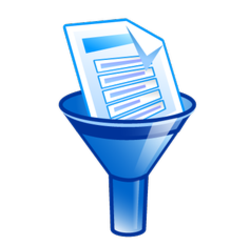

In [8]:
y=data.state
x = comments_3

In [9]:
tvec = TfidfVectorizer(ngram_range=(1,2))
x_train_tfidf = tvec.fit_transform(x)


clf2 =  naive_bayes.MultinomialNB()
#clf2.fit(x_train_tfidf,y)
scores = cross_val_score(clf2,x_train_tfidf,y,cv=5,scoring="accuracy")
tfidf_1_3 = scores.mean()
print("accuracy= ",tfidf_1_3*100)

AttributeError: 'list' object has no attribute 'lower'

# Extracting Features Using Tf_idf Method With ngram(1,3)

In [47]:
tvec = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False, ngram_range=(1,2))
x_train_tfidf = tvec.fit_transform(x)


clf2 =  naive_bayes.MultinomialNB()
#clf2.fit(x_train_tfidf,y)
scores = cross_val_score(clf2,x_train_tfidf,y,cv=5,scoring="accuracy")
tfidf_1_3 = scores.mean()
print("accuracy= ",tfidf_1_3*100)

accuracy=  80.2


# SVM, Logistic Regression, Multinomial NB Evaluation with Binary & TF-IDF

In [48]:
from sklearn import svm
NB = naive_bayes.MultinomialNB()
LR = LogisticRegression()
svc = svm.SVC(kernel='linear', C=1, gamma=1)
Classifiers = [NB,LR,svc]
Accuracy = []
for i in Classifiers:
    score2 = cross_val_score(i,x_train_tfidf,y,cv=5,scoring="accuracy")
    Accuracy.append(score2.mean()*100)



print(Accuracy)


[80.199999999999989, 80.849999999999994, 82.125]


# Feature Selection


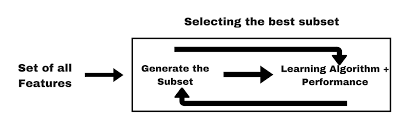

<font size=5>your texthere</font>

# Selecting best Feature Using CHI-2

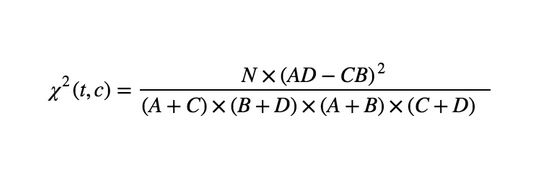

In [142]:
Image(filename="/home/nazifa/Desktop/Share/chi2.png", width =600, height =200)

In [49]:
from sklearn.feature_selection import chi2
chi2score = chi2(x_train_tfidf, y)[0]


In [50]:

from bidi.algorithm import get_display
import arabic_reshaper
def make_farsi_text(x):
    reshaped_text = arabic_reshaper.reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text


# Sample Work of CHI-Square

('ث ي', '  ن', 'خ و', 'گ ف', '  خ', 'ح  ', '- -', 'ص ل', 'ا ف', '  ع', 'ی ف', 'ا ص', 'ب د', 'ث', 'ف  ', 'و ب', 'ع ا', 'ت ض', 'ک ث', 'ث ی')


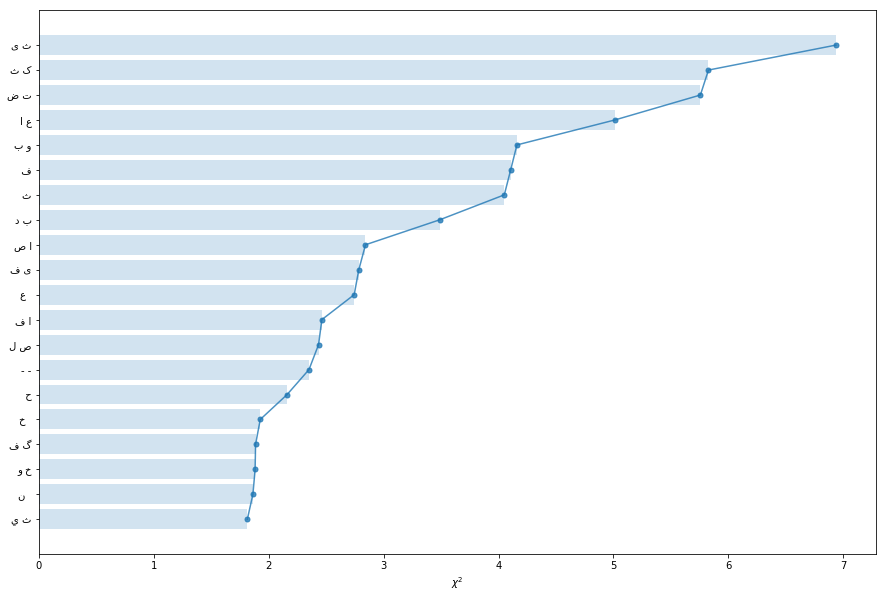

In [51]:
pt.figure(figsize=(15,10))
wscores = zip(tvec.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = zip(*wchi2[-20:])
topchi2 = list(topchi2)
x = range(len(topchi2[1]))
labels = topchi2[0]
pt.barh(x,topchi2[1], align='center', alpha=0.2)

arr=[]
for i in labels:
    arr.append(make_farsi_text(i))
pt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
pt.yticks(x, arr)
pt.xlabel('$\chi^2$')
print(topchi2[0])
pt.show()


# Accuracy for different k Features with Logistic Regression

In [52]:
import matplotlib.pyplot as plt
ch2_result = []
n_values=[]
for n in np.arange(1000,10000,1000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y)
    
    clf = LogisticRegression()
    clf.fit(x_train_chi2_selected,y)
    scores = cross_val_score(clf,x_train_chi2_selected,y,cv=10,scoring="accuracy")
    m = scores.mean()*100
    n_values.append(n)
    ch2_result.append(m)
    print("chi2 feature selection evaluation calculated  {} for {} features".format(m,n))

xp=n_values
yp=ch2_result

plt.plot(xp,yp, label="Multinomial NB")
plt.legend()
plt.show()

chi2 feature selection evaluation calculated  80.65 for 1000 features
chi2 feature selection evaluation calculated  81.175 for 2000 features
chi2 feature selection evaluation calculated  81.0 for 3000 features


ValueError: k should be >=0, <= n_features; got 4000.Use k='all' to return all features.

Now we select k =8000 because it delivers highest accuracy

# Accuracy for different k Features with Multinomial Naive bayes

In [53]:
ch2_result = []
n_values=[]
for n in np.arange(1000,10000,1000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y)
    
    clf = naive_bayes.MultinomialNB()
    clf.fit(x_train_chi2_selected,y)
    scores = cross_val_score(clf,x_train_chi2_selected,y,cv=10,scoring="accuracy")
    m = scores.mean()*100
    n_values.append(n)
    ch2_result.append(m)
    print("chi2 feature selection evaluation calculated  {} for {} features".format(m,n))

xp=n_values
yp=ch2_result

import matplotlib.pyplot as plt 

plt.plot(xp,yp, label="Gaussian NB")
plt.legend()
plt.show()


chi2 feature selection evaluation calculated  82.5 for 1000 features
chi2 feature selection evaluation calculated  81.60000000000001 for 2000 features
chi2 feature selection evaluation calculated  81.2 for 3000 features


ValueError: k should be >=0, <= n_features; got 4000.Use k='all' to return all features.

# Accuracy for different k Features with SVM

chi2 feature selection evaluation calculated  88.35000000000001 for 1000 features
chi2 feature selection evaluation calculated  88.44999999999999 for 2000 features
chi2 feature selection evaluation calculated  88.225 for 3000 features
chi2 feature selection evaluation calculated  88.4 for 4000 features
chi2 feature selection evaluation calculated  88.52499999999999 for 5000 features
chi2 feature selection evaluation calculated  88.5 for 6000 features
chi2 feature selection evaluation calculated  88.52499999999999 for 7000 features
chi2 feature selection evaluation calculated  88.27499999999999 for 8000 features
chi2 feature selection evaluation calculated  88.325 for 9000 features


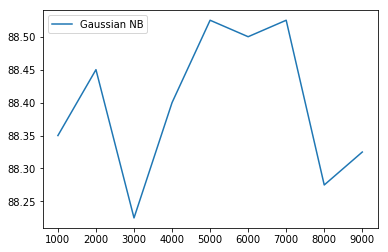

In [29]:
ch2_result = []
n_values=[]
for n in np.arange(1000,10000,1000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y)
    
    clf = svm.SVC(kernel="linear")
    clf.fit(x_train_chi2_selected,y)
    scores = cross_val_score(clf,x_train_chi2_selected,y,cv=10,scoring="accuracy")
    m = scores.mean()*100
    n_values.append(n)
    ch2_result.append(m)
    print("chi2 feature selection evaluation calculated  {} for {} features".format(m,n))

xp=n_values
yp=ch2_result

import matplotlib.pyplot as plt 

plt.plot(xp,yp, label="Gaussian NB")
plt.legend()
plt.show()


#  Comparing Three various algorithms


<font size=5, style=bold>Naive Bayes Classifier</font>

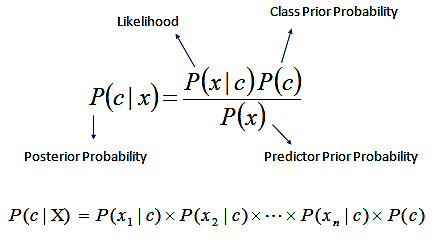

<font size=5, style=bold>Logistic Regression</font>

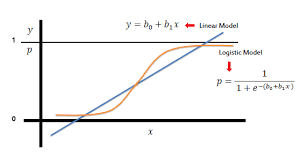

<font size=5, style=bold>Support Vector Machine</font>

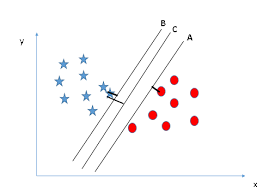

In [54]:
from sklearn import svm
NB =naive_bayes.MultinomialNB() 
LR = LogisticRegression()
svm = svm.SVC(kernel="linear")
Classifiers = [NB,LR,svm]
Accuracy = []
for i in Classifiers:
    ch2 = SelectKBest(chi2, k=9000)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y)
    scores = cross_val_score(i,x_train_chi2_selected,y,cv=5,scoring="accuracy")
    Accuracy.append(scores.mean())

print(Accuracy)

ValueError: k should be >=0, <= n_features; got 9000.Use k='all' to return all features.

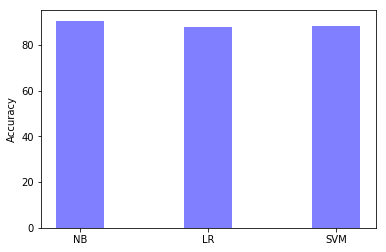

In [52]:
acc=[]
for i in Accuracy:
    acc.append(i*100)

objects = ["NB","LR","SVM"]
y_pos = [0,0.4,0.8]
# performance = [10,8,6,4,2,1]
 
pt.bar(y_pos, acc, align='center', alpha=0.5, color="b", width=0.15)
pt.xticks(y_pos, objects)
pt.ylabel('Accuracy')
pt.show()


In [55]:
from sklearn import svm
#clf = svm.SVC(kernel="linear")
clf = naive_bayes.MultinomialNB()
clf.fit(x_train_chi2_selected,y)
def predict(sentence):
    sentence = np.array([sentence])
#     sentence = [sentence]
#     sentence = Removing_numbers(sentence)
#     sentence = Removing_dots_qiz_eq(sentence)
    sentence = tokenizing(sentence)
#     sentence = lemmatizing_all(sentence)
#     sentence = word_tokenize(sentence)
    sentence = tvec.transform(sentence)
    sentence = ch2.transform(sentence)
#    print(sentence)
    return clf.predict(sentence)

In [56]:
sent = 'هوتل محیط  خیلی بسته است'

In [57]:
predict(sent)

NotFittedError: This SelectKBest instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [314]:
print(predict("از روغن کنجید استفاده نمونه غذایش صحی نیس پول زیاد میگیره ولی غذایش بسنده نیست. عوض گوشت گوسفند گوشت گاومیش د تکه کباب استفاده مونه خخخخ"))

['neg']


In [116]:
print(predicting("هوتل بسیار مجلل اما بدون کارمندان فنی "))

['neg']


0.82925


In [ ]:

import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)
for n in [1, 2, 3, 4]:
    plt.plot(t1, t1**n, label="n=%d"%(n,))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show(